In [1]:
%matplotlib inline

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

In [3]:
path = 'Dropbox/OpenUniversity/S382_Astrophysics/SDSS_Project/sdss_abell/spectrum_z03_z18/master_z03_z18/auto_z03_z18'
file = 'spectrum_z03_z18_auto.csv' #this would be the SpecCombine csv output file
df = pd.read_csv(os.path.join(path, file))

In [41]:
df['SD']=df['error']*df['data_points']**0.5
df['SNR']=df['flux']/df['SD']
s = 1 #s=SNR_scaling_factor
df['SNR'] = df['SNR']*s
df['+SEM'] = df['flux']+df['error']
df['-SEM'] = df['flux']-df['error']
df.tail(2)

,wavelength,flux,is_good,data_points,scatter,error,Unnamed: 6,power_law_continuum_model,flux_minus_model,SD,SNR,+SEM,-SEM
5231,6513,43.335573,1,1,0.0,2.718371,NaN,32.015205,11.320368,2.718371,15.941743,46.053944,40.617202
5232,6515,44.464527,1,1,0.0,2.739051,NaN,32.000199,12.464328,2.739051,16.233552,47.203578,41.725476


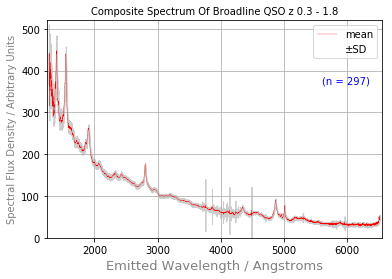

In [72]:
wave = df['wavelength']
err_1 = df['flux']+df['SD'] # +SD
err_2 = df['flux']-df['SD'] # -SD
# err_3 = df['flux']+*df['error'] # +SEM
# err_4 = df['flux']-*df['error'] # -SEM

ax1 = df.plot(x='wavelength', y='flux', lw=0.3, color='red', label='mean') 

ax2 = df.plot(x='wavelength', y='+SEM', lw=0.000001
             , color='yellow', label='±SD', ax=ax1)

# ax3 = df.plot(x='wavelength', y ='+SEM', lw=0.05
 #            , color='grey', label='±SD', ax=ax1)

#ax2 = df.plot(x='wavelength', y='SNR', lw=0.2
#             , color='red', ax=ax1)

plt.legend()
plt.title('Composite Spectrum Of Broadline QSO z 0.3 - 1.8', fontsize=10, color='black')
plt.grid()


plt.fill_between(wave, err_1, err_2, color='#CCCCCC') # ±SD
# plt.fill_between(wave, err_3, err_4, color='grey') # ±SEM

# ax1.set_facecolor('black')

ax1.text(0.82, 0.7, '(n = 297)',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='blue', fontsize=10)

plt.xlim(1250, 6550)
plt.ylim(0,520)

plt.xlabel('Emitted Wavelength / Angstroms',  fontsize=13, color='grey')
plt.ylabel('Spectral Flux Density / Arbitrary Units', fontsize=10, color='grey')

plt.savefig(os.path.join(path, 'spectrum_z03_z18_auto.png'), dpi = 1080)
#plt.savefig(os.path.join(path, 'speccombine_z1676_z1800.pdf'))